# Variational Autoencoder with Sylvester Normalizing Flow applied on Caltech Silhouettes 101

In [1]:
import torch
import torch.utils.data as tdata
from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import scipy.io

from NF.autoencoders import VariationalAutoencoderOriginal, VariationalAutoencoderNormalizingFlow
from NF.transformations import PlanarTransformation, TriagSylvesterTransformation
from NF.training import train, test
from NF.utils import plot_image

In [2]:
DEVICE = 'cuda'

img_rows=28
img_cols=28

data = scipy.io.loadmat('../data/cal_silh/caltech101_silhouettes_28_split1.mat')

batch_size = 100

def reshape_data(data):
    data_ = data.reshape((-1, 1, img_rows, img_cols))
    data_ = data_.astype('float32')
    size = len(data_)

    data_ = data_[:int(size/batch_size)*batch_size]
    return data_

data_tr = reshape_data(data['train_data'])
data_te = reshape_data(data['test_data'])

data_tr_torch = torch.from_numpy(data_tr)
data_te_torch = torch.from_numpy(data_te)

train_loader = tdata.DataLoader(data_tr_torch, batch_size=100, shuffle=True)
test_loader = tdata.DataLoader(
    data_te_torch,
    batch_size=100, shuffle=False)

# a large batch will be used to compute average flow parameters after training
large_batch = []
for i, x in enumerate(train_loader):
    if i > 1000:
        break
    large_batch.append(x)
large_batch = torch.cat(large_batch).view(-1, img_rows * img_cols).to(DEVICE)

In [6]:
flow_len = 16
num_latent = 64

sylv_vae = VariationalAutoencoderNormalizingFlow(img_rows * img_cols,
                                                 num_latent,
                                                 TriagSylvesterTransformation,
                                                 num_latent, flow_len).to(DEVICE)
optimizer = optim.Adam(sylv_vae.parameters(), lr=1e-3)

Train Epoch: 1 [0/4100 (0%)]	Loss: 105.729375
====> Epoch: 1 Average loss: 99.8467


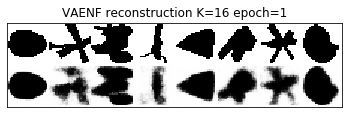

====> Test set loss: 111.3632
Train Epoch: 2 [0/4100 (0%)]	Loss: 89.205313
====> Epoch: 2 Average loss: 99.1560


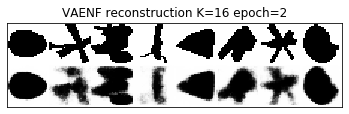

====> Test set loss: 111.4214
Train Epoch: 3 [0/4100 (0%)]	Loss: 100.825615
====> Epoch: 3 Average loss: 98.5502


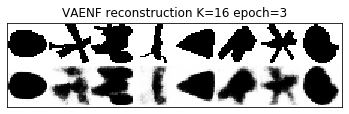

====> Test set loss: 111.7590
Train Epoch: 4 [0/4100 (0%)]	Loss: 91.712656
====> Epoch: 4 Average loss: 98.0071


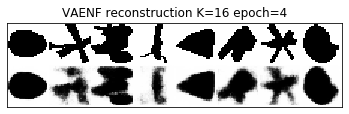

====> Test set loss: 111.0280
Train Epoch: 5 [0/4100 (0%)]	Loss: 100.713643
====> Epoch: 5 Average loss: 97.7880


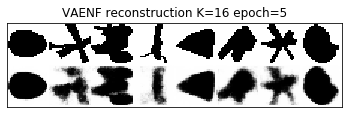

====> Test set loss: 111.8166
Train Epoch: 6 [0/4100 (0%)]	Loss: 96.662998
====> Epoch: 6 Average loss: 96.9478


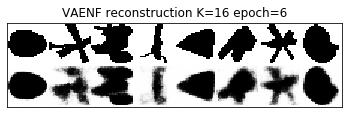

====> Test set loss: 111.3500
Train Epoch: 7 [0/4100 (0%)]	Loss: 86.054912
====> Epoch: 7 Average loss: 96.6599


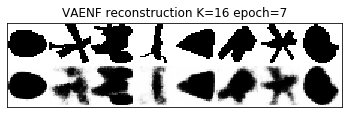

====> Test set loss: 112.7979
Train Epoch: 8 [0/4100 (0%)]	Loss: 103.760215
====> Epoch: 8 Average loss: 96.8620


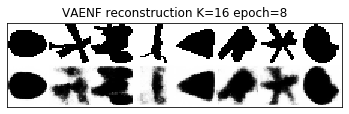

====> Test set loss: 111.6209
Train Epoch: 9 [0/4100 (0%)]	Loss: 108.029365
====> Epoch: 9 Average loss: 96.0102


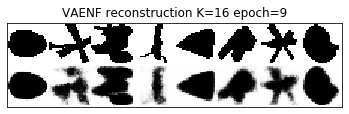

====> Test set loss: 112.3628
Train Epoch: 10 [0/4100 (0%)]	Loss: 92.045508
====> Epoch: 10 Average loss: 96.3435


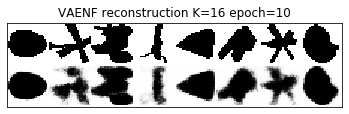

====> Test set loss: 113.4146


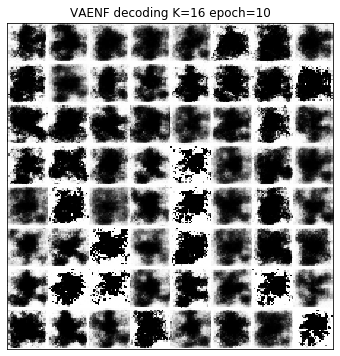

Train Epoch: 11 [0/4100 (0%)]	Loss: 93.529434
====> Epoch: 11 Average loss: 95.5203


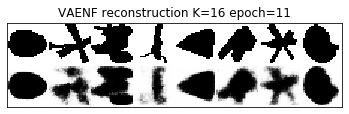

====> Test set loss: 112.3742
Train Epoch: 12 [0/4100 (0%)]	Loss: 92.579941
====> Epoch: 12 Average loss: 95.2391


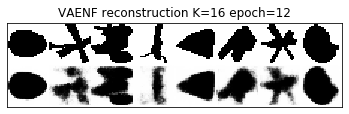

====> Test set loss: 111.6490
Train Epoch: 13 [0/4100 (0%)]	Loss: 92.346670
====> Epoch: 13 Average loss: 93.9344


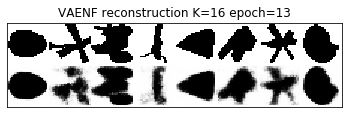

====> Test set loss: 111.9163
Train Epoch: 14 [0/4100 (0%)]	Loss: 95.822715
====> Epoch: 14 Average loss: 93.8583


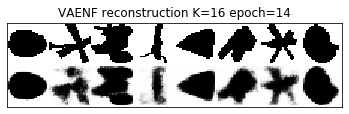

====> Test set loss: 112.2895
Train Epoch: 15 [0/4100 (0%)]	Loss: 97.646221
====> Epoch: 15 Average loss: 93.3852


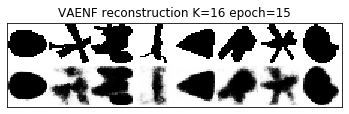

====> Test set loss: 111.9320
Train Epoch: 16 [0/4100 (0%)]	Loss: 92.808633
====> Epoch: 16 Average loss: 92.9158


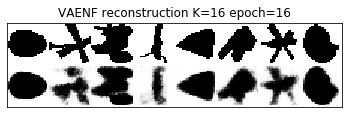

====> Test set loss: 111.5609
Train Epoch: 17 [0/4100 (0%)]	Loss: 84.465127
====> Epoch: 17 Average loss: 92.6837


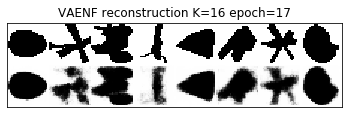

====> Test set loss: 112.6229
Train Epoch: 18 [0/4100 (0%)]	Loss: 78.179189
====> Epoch: 18 Average loss: 92.4175


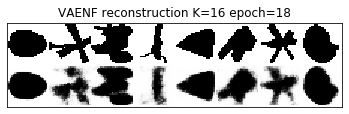

====> Test set loss: 112.5851
Train Epoch: 19 [0/4100 (0%)]	Loss: 92.987979
====> Epoch: 19 Average loss: 92.0492


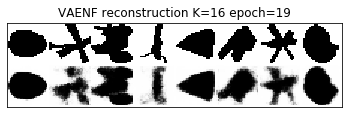

====> Test set loss: 113.5687
Train Epoch: 20 [0/4100 (0%)]	Loss: 98.073184
====> Epoch: 20 Average loss: 91.8548


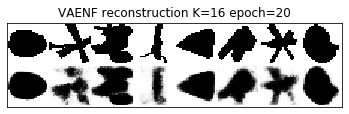

====> Test set loss: 112.6212


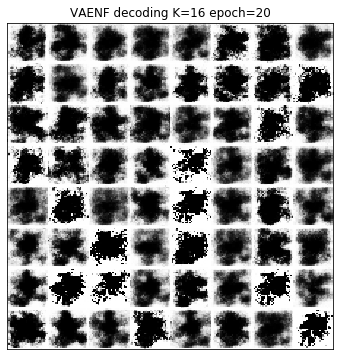

Train Epoch: 21 [0/4100 (0%)]	Loss: 90.041514
====> Epoch: 21 Average loss: 91.0258


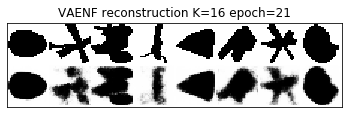

====> Test set loss: 113.6515
Train Epoch: 22 [0/4100 (0%)]	Loss: 97.032246
====> Epoch: 22 Average loss: 90.6563


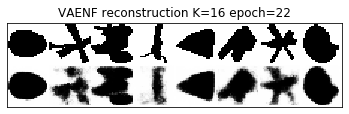

====> Test set loss: 112.5186
Train Epoch: 23 [0/4100 (0%)]	Loss: 89.388096
====> Epoch: 23 Average loss: 90.6705


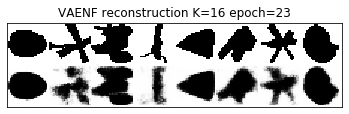

====> Test set loss: 113.4190
Train Epoch: 24 [0/4100 (0%)]	Loss: 83.368057
====> Epoch: 24 Average loss: 91.8958


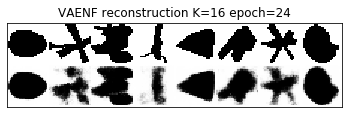

====> Test set loss: 113.1001
Train Epoch: 25 [0/4100 (0%)]	Loss: 82.051104
====> Epoch: 25 Average loss: 89.7086


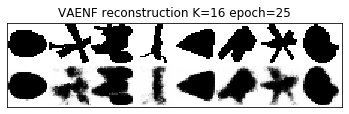

====> Test set loss: 114.7509
Train Epoch: 26 [0/4100 (0%)]	Loss: 91.911055
====> Epoch: 26 Average loss: 89.3310


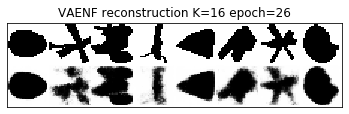

====> Test set loss: 113.4942
Train Epoch: 27 [0/4100 (0%)]	Loss: 90.586084
====> Epoch: 27 Average loss: 88.9929


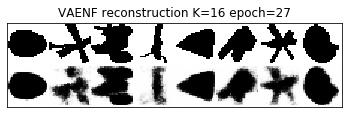

====> Test set loss: 112.6024
Train Epoch: 28 [0/4100 (0%)]	Loss: 79.577583
====> Epoch: 28 Average loss: 88.6907


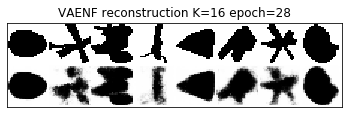

====> Test set loss: 113.3328
Train Epoch: 29 [0/4100 (0%)]	Loss: 80.909199
====> Epoch: 29 Average loss: 88.1340


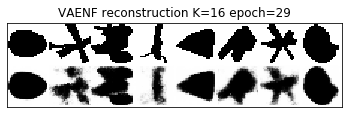

====> Test set loss: 113.3036
Train Epoch: 30 [0/4100 (0%)]	Loss: 90.347607
====> Epoch: 30 Average loss: 87.9349


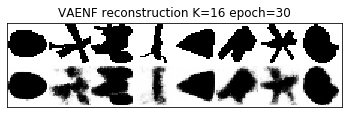

====> Test set loss: 114.1465


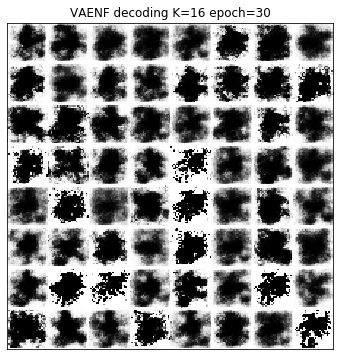

Train Epoch: 31 [0/4100 (0%)]	Loss: 90.822256
====> Epoch: 31 Average loss: 87.8005


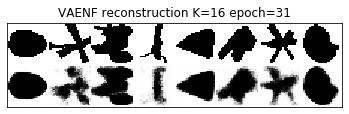

====> Test set loss: 118.5558
Train Epoch: 32 [0/4100 (0%)]	Loss: 80.427109
====> Epoch: 32 Average loss: 87.5238


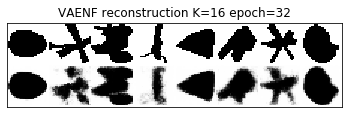

====> Test set loss: 113.7029
Train Epoch: 33 [0/4100 (0%)]	Loss: 80.022998
====> Epoch: 33 Average loss: 87.6971


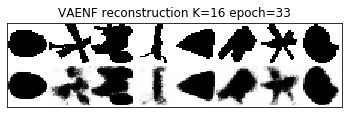

====> Test set loss: 117.1681
Train Epoch: 34 [0/4100 (0%)]	Loss: 83.391338
====> Epoch: 34 Average loss: 86.6435


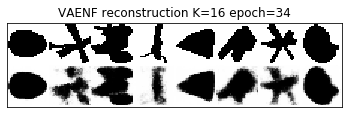

====> Test set loss: 113.7925
Train Epoch: 35 [0/4100 (0%)]	Loss: 89.856777
====> Epoch: 35 Average loss: 86.2115


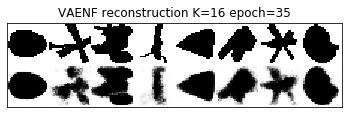

====> Test set loss: 116.0975
Train Epoch: 36 [0/4100 (0%)]	Loss: 89.448008
====> Epoch: 36 Average loss: 85.6924


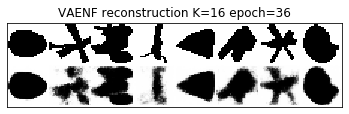

====> Test set loss: 114.8432
Train Epoch: 37 [0/4100 (0%)]	Loss: 83.296885
====> Epoch: 37 Average loss: 85.4499


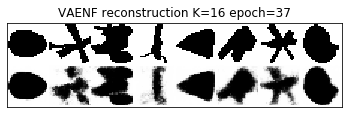

====> Test set loss: 115.3563
Train Epoch: 38 [0/4100 (0%)]	Loss: 85.362529
====> Epoch: 38 Average loss: 85.5383


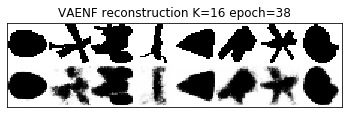

====> Test set loss: 116.4611
Train Epoch: 39 [0/4100 (0%)]	Loss: 77.122017
====> Epoch: 39 Average loss: 84.7667


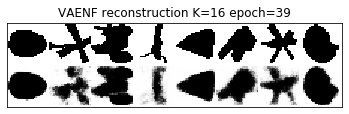

====> Test set loss: 116.7133
Train Epoch: 40 [0/4100 (0%)]	Loss: 80.844204
====> Epoch: 40 Average loss: 84.5148


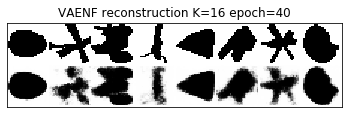

====> Test set loss: 115.2872


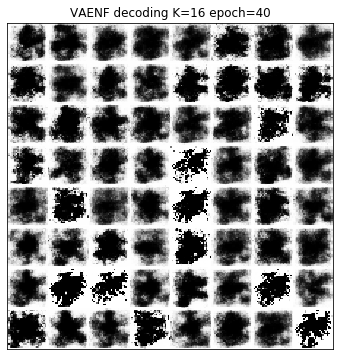

Train Epoch: 41 [0/4100 (0%)]	Loss: 79.431377
====> Epoch: 41 Average loss: 83.9102


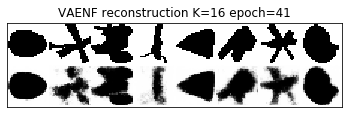

====> Test set loss: 114.3199
Train Epoch: 42 [0/4100 (0%)]	Loss: 82.846250
====> Epoch: 42 Average loss: 83.8707


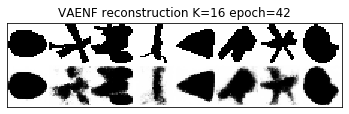

====> Test set loss: 116.9037
Train Epoch: 43 [0/4100 (0%)]	Loss: 78.363916
====> Epoch: 43 Average loss: 83.0755


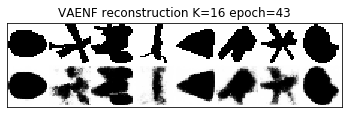

====> Test set loss: 115.8051
Train Epoch: 44 [0/4100 (0%)]	Loss: 81.144375
====> Epoch: 44 Average loss: 82.8765


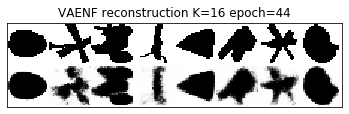

====> Test set loss: 116.7360
Train Epoch: 45 [0/4100 (0%)]	Loss: 82.669922
====> Epoch: 45 Average loss: 82.7040


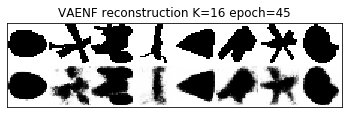

====> Test set loss: 117.1200
Train Epoch: 46 [0/4100 (0%)]	Loss: 84.723828
====> Epoch: 46 Average loss: 82.6640


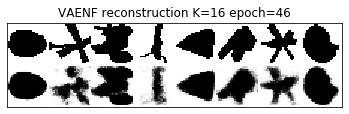

====> Test set loss: 116.2441
Train Epoch: 47 [0/4100 (0%)]	Loss: 81.866128
====> Epoch: 47 Average loss: 81.9036


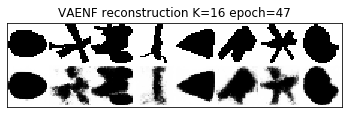

====> Test set loss: 117.7910
Train Epoch: 48 [0/4100 (0%)]	Loss: 78.614800
====> Epoch: 48 Average loss: 82.0512


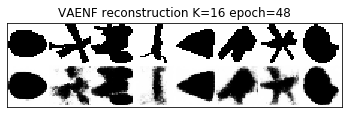

====> Test set loss: 117.5152
Train Epoch: 49 [0/4100 (0%)]	Loss: 82.463584
====> Epoch: 49 Average loss: 81.5059


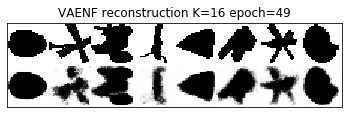

====> Test set loss: 117.0870
Train Epoch: 50 [0/4100 (0%)]	Loss: 78.138638
====> Epoch: 50 Average loss: 81.8347


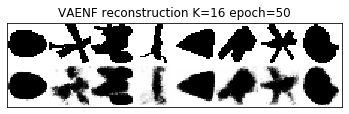

====> Test set loss: 116.1146


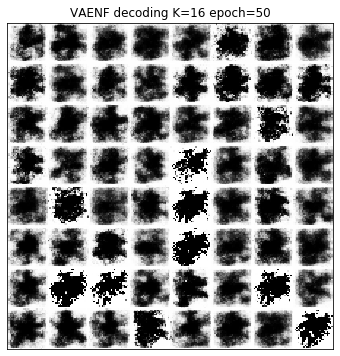

Train Epoch: 51 [0/4100 (0%)]	Loss: 77.037075
====> Epoch: 51 Average loss: 80.6630


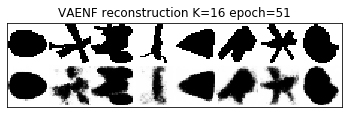

====> Test set loss: 117.6492
Train Epoch: 52 [0/4100 (0%)]	Loss: 78.458774
====> Epoch: 52 Average loss: 80.1363


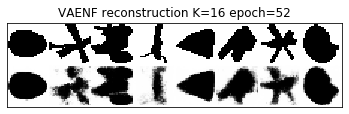

====> Test set loss: 117.1108
Train Epoch: 53 [0/4100 (0%)]	Loss: 79.729302
====> Epoch: 53 Average loss: 79.6147


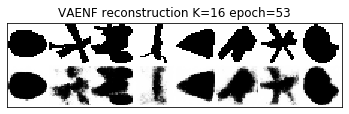

====> Test set loss: 115.4652
Train Epoch: 54 [0/4100 (0%)]	Loss: 77.501909
====> Epoch: 54 Average loss: 79.8507


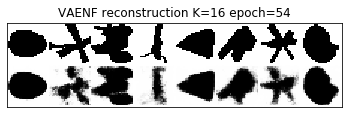

====> Test set loss: 118.2325
Train Epoch: 55 [0/4100 (0%)]	Loss: 78.258628
====> Epoch: 55 Average loss: 78.6340


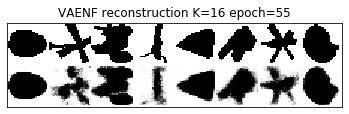

====> Test set loss: 119.9060
Train Epoch: 56 [0/4100 (0%)]	Loss: 76.723071
====> Epoch: 56 Average loss: 78.3552


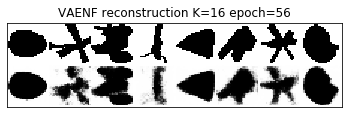

====> Test set loss: 118.0993
Train Epoch: 57 [0/4100 (0%)]	Loss: 72.312300
====> Epoch: 57 Average loss: 78.2529


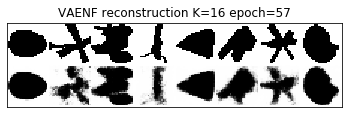

====> Test set loss: 119.0596
Train Epoch: 58 [0/4100 (0%)]	Loss: 81.146816
====> Epoch: 58 Average loss: 77.6665


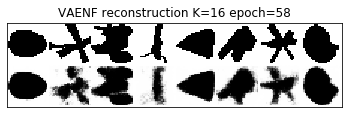

====> Test set loss: 118.6176
Train Epoch: 59 [0/4100 (0%)]	Loss: 81.771533
====> Epoch: 59 Average loss: 77.7994


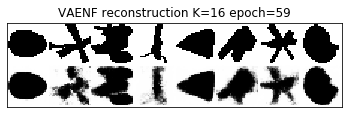

====> Test set loss: 119.1703
Train Epoch: 60 [0/4100 (0%)]	Loss: 85.926260
====> Epoch: 60 Average loss: 77.5734


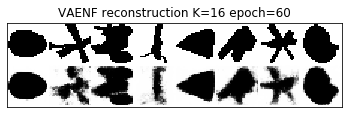

====> Test set loss: 120.3445


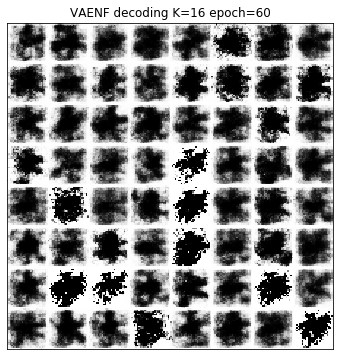

Train Epoch: 61 [0/4100 (0%)]	Loss: 76.819355
====> Epoch: 61 Average loss: 76.8471


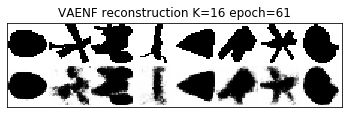

====> Test set loss: 119.8235
Train Epoch: 62 [0/4100 (0%)]	Loss: 74.972964
====> Epoch: 62 Average loss: 76.8087


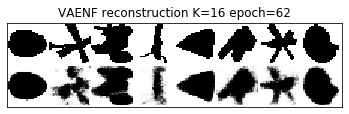

====> Test set loss: 119.5868
Train Epoch: 63 [0/4100 (0%)]	Loss: 75.268882
====> Epoch: 63 Average loss: 76.5664


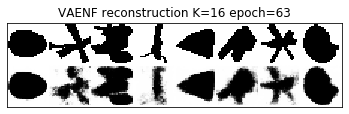

====> Test set loss: 118.6442
Train Epoch: 64 [0/4100 (0%)]	Loss: 80.590967
====> Epoch: 64 Average loss: 75.7216


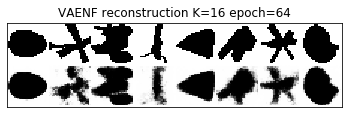

====> Test set loss: 119.2145
Train Epoch: 65 [0/4100 (0%)]	Loss: 74.097710
====> Epoch: 65 Average loss: 75.4232


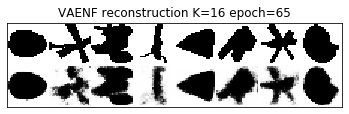

====> Test set loss: 121.4484
Train Epoch: 66 [0/4100 (0%)]	Loss: 70.956709
====> Epoch: 66 Average loss: 75.0968


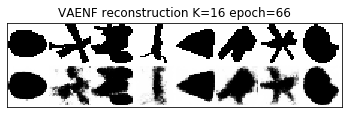

====> Test set loss: 121.3528
Train Epoch: 67 [0/4100 (0%)]	Loss: 72.950400
====> Epoch: 67 Average loss: 75.9053


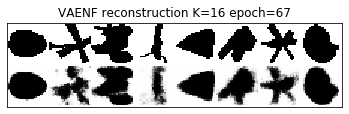

====> Test set loss: 120.0793
Train Epoch: 68 [0/4100 (0%)]	Loss: 72.159126
====> Epoch: 68 Average loss: 75.6826


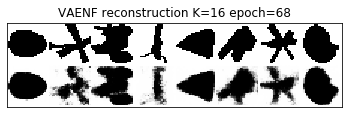

====> Test set loss: 122.3708
Train Epoch: 69 [0/4100 (0%)]	Loss: 74.375742
====> Epoch: 69 Average loss: 75.7944


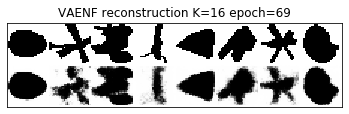

====> Test set loss: 119.2493
Train Epoch: 70 [0/4100 (0%)]	Loss: 72.116855
====> Epoch: 70 Average loss: 74.5281


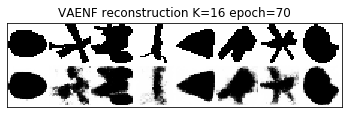

====> Test set loss: 122.0627


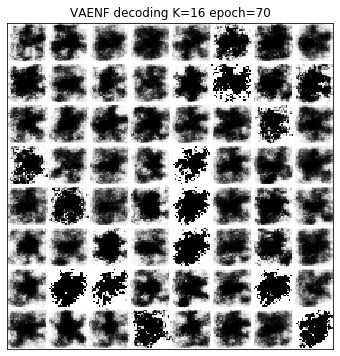

Train Epoch: 71 [0/4100 (0%)]	Loss: 70.451973
====> Epoch: 71 Average loss: 73.8322


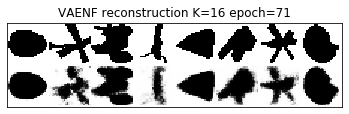

====> Test set loss: 121.1635
Train Epoch: 72 [0/4100 (0%)]	Loss: 70.342061
====> Epoch: 72 Average loss: 73.6141


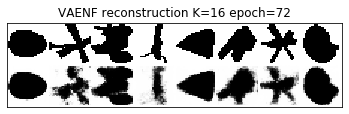

====> Test set loss: 122.4537
Train Epoch: 73 [0/4100 (0%)]	Loss: 73.561182
====> Epoch: 73 Average loss: 73.9392


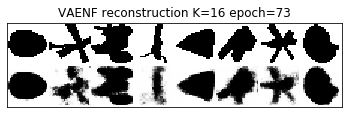

====> Test set loss: 121.8508
Train Epoch: 74 [0/4100 (0%)]	Loss: 68.098677
====> Epoch: 74 Average loss: 73.1411


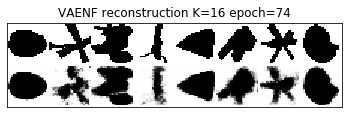

====> Test set loss: 121.3868
Train Epoch: 75 [0/4100 (0%)]	Loss: 64.545977
====> Epoch: 75 Average loss: 72.5635


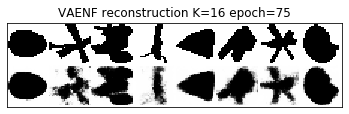

====> Test set loss: 121.7709
Train Epoch: 76 [0/4100 (0%)]	Loss: 70.336870
====> Epoch: 76 Average loss: 73.4068


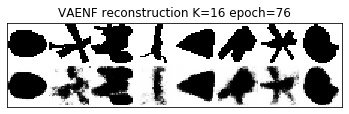

====> Test set loss: 125.1448
Train Epoch: 77 [0/4100 (0%)]	Loss: 78.332290
====> Epoch: 77 Average loss: 73.9022


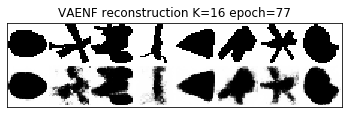

====> Test set loss: 122.0433
Train Epoch: 78 [0/4100 (0%)]	Loss: 70.804336
====> Epoch: 78 Average loss: 72.3091


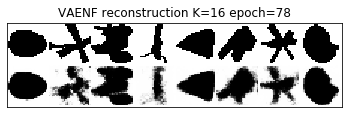

====> Test set loss: 122.7392
Train Epoch: 79 [0/4100 (0%)]	Loss: 70.466313
====> Epoch: 79 Average loss: 71.9039


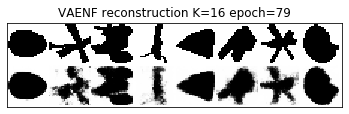

====> Test set loss: 122.9102
Train Epoch: 80 [0/4100 (0%)]	Loss: 68.461250
====> Epoch: 80 Average loss: 71.9897


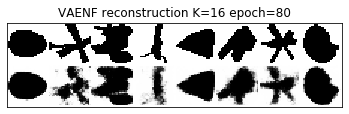

====> Test set loss: 123.6029


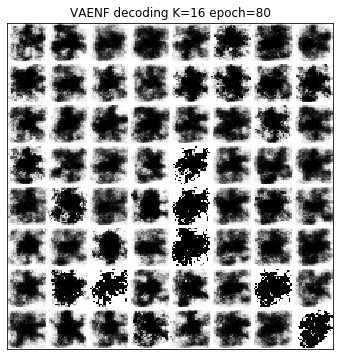

Train Epoch: 81 [0/4100 (0%)]	Loss: 71.554595
====> Epoch: 81 Average loss: 71.0358


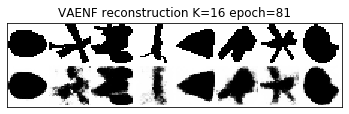

====> Test set loss: 122.9941
Train Epoch: 82 [0/4100 (0%)]	Loss: 67.058691
====> Epoch: 82 Average loss: 70.7541


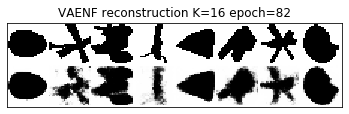

====> Test set loss: 126.4834
Train Epoch: 83 [0/4100 (0%)]	Loss: 67.288271
====> Epoch: 83 Average loss: 70.7188


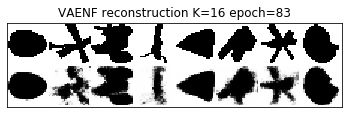

====> Test set loss: 124.6907
Train Epoch: 84 [0/4100 (0%)]	Loss: 68.850098
====> Epoch: 84 Average loss: 70.3113


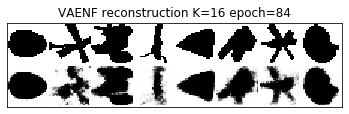

====> Test set loss: 124.2822
Train Epoch: 85 [0/4100 (0%)]	Loss: 69.007993
====> Epoch: 85 Average loss: 70.1120


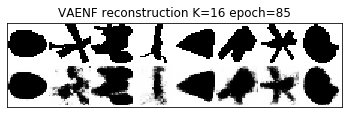

====> Test set loss: 125.4821
Train Epoch: 86 [0/4100 (0%)]	Loss: 67.685454
====> Epoch: 86 Average loss: 70.0858


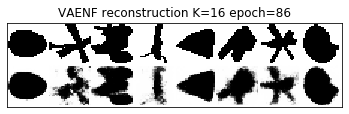

====> Test set loss: 125.9116
Train Epoch: 87 [0/4100 (0%)]	Loss: 61.675767
====> Epoch: 87 Average loss: 69.9929


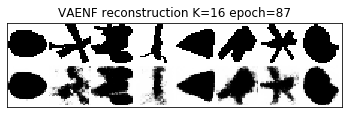

====> Test set loss: 129.0236
Train Epoch: 88 [0/4100 (0%)]	Loss: 59.843042
====> Epoch: 88 Average loss: 69.3187


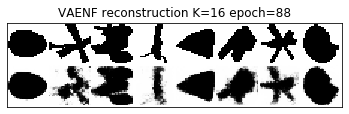

====> Test set loss: 128.9608
Train Epoch: 89 [0/4100 (0%)]	Loss: 64.504209
====> Epoch: 89 Average loss: 69.6709


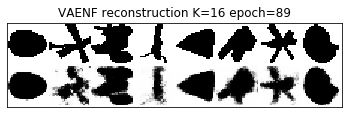

====> Test set loss: 127.6676
Train Epoch: 90 [0/4100 (0%)]	Loss: 68.072485
====> Epoch: 90 Average loss: 69.4521


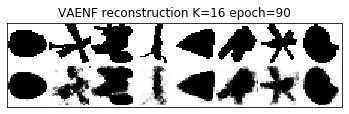

====> Test set loss: 125.9825


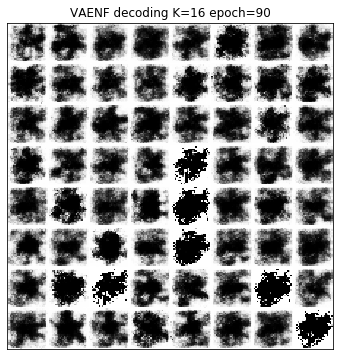

Train Epoch: 91 [0/4100 (0%)]	Loss: 68.646147
====> Epoch: 91 Average loss: 68.5030


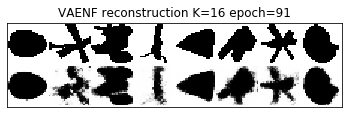

====> Test set loss: 128.0208
Train Epoch: 92 [0/4100 (0%)]	Loss: 77.170728
====> Epoch: 92 Average loss: 68.2483


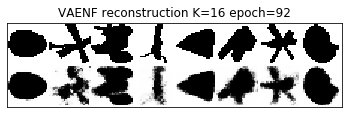

====> Test set loss: 129.1590
Train Epoch: 93 [0/4100 (0%)]	Loss: 59.992583
====> Epoch: 93 Average loss: 68.0843


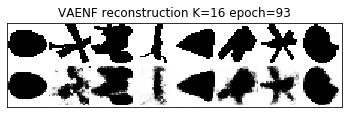

====> Test set loss: 131.8771
Train Epoch: 94 [0/4100 (0%)]	Loss: 67.809819
====> Epoch: 94 Average loss: 68.3781


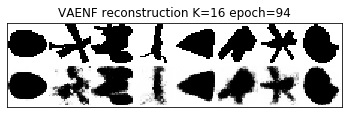

====> Test set loss: 127.3717
Train Epoch: 95 [0/4100 (0%)]	Loss: 66.125933
====> Epoch: 95 Average loss: 68.4129


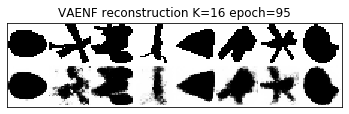

====> Test set loss: 128.3401
Train Epoch: 96 [0/4100 (0%)]	Loss: 57.711914
====> Epoch: 96 Average loss: 67.9564


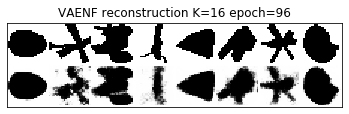

====> Test set loss: 128.4158
Train Epoch: 97 [0/4100 (0%)]	Loss: 69.444111
====> Epoch: 97 Average loss: 67.5480


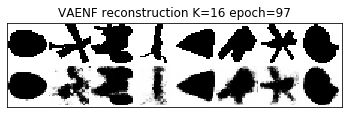

====> Test set loss: 129.1691
Train Epoch: 98 [0/4100 (0%)]	Loss: 68.628325
====> Epoch: 98 Average loss: 67.3800


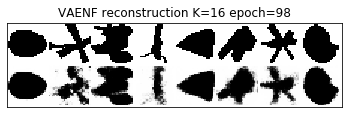

====> Test set loss: 129.8563
Train Epoch: 99 [0/4100 (0%)]	Loss: 66.810288
====> Epoch: 99 Average loss: 67.6709


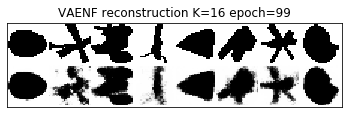

====> Test set loss: 128.8530
Train Epoch: 100 [0/4100 (0%)]	Loss: 69.647192
====> Epoch: 100 Average loss: 67.6068


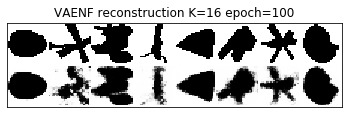

====> Test set loss: 133.4854


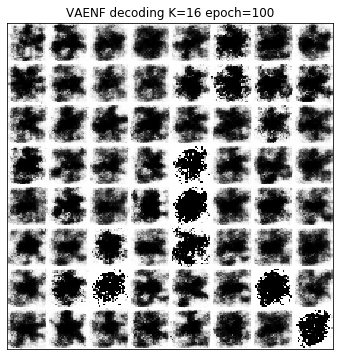

In [8]:
sample = torch.randn(64, num_latent, device=DEVICE)
for epoch in range(1, 100 + 1):
    train(epoch, sylv_vae, optimizer, train_loader, DEVICE)
    test(epoch, sylv_vae, test_loader, DEVICE)
    if epoch % 10 == 0:
        with torch.no_grad():
            _ , _, params = sylv_vae.encode(large_batch)
            sample_dec = sylv_vae.decode( sylv_vae.flow.forward( sample, params ) )
            plot_image(sample_dec.view(64, 1, img_rows, img_cols),
                'VAENF decoding K=' + str(sylv_vae.flow.K) + " epoch=" + str(epoch), figsize=[6, 6], padding=0)

In [9]:
sylv_vae.to('cpu')

VariationalAutoencoderNormalizingFlow(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21_mean): Linear(in_features=400, out_features=64, bias=True)
  (fc22_var): Linear(in_features=400, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
  (fc23_flow): Linear(in_features=400, out_features=7040, bias=True)
)

In [10]:
torch.cuda.empty_cache()